In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
#from configs.RecursiveVPSDE.Markovian_fQuadSinHF.recursive_Markovian_PostMeanScore_fQuadSinHF2_LowFTh_T256_H05_tl_110data_StbleTgt_HIGHNOISE import get_config
from configs.RecursiveVPSDE.Markovian_fSinLog.recursive_Markovian_PostMeanScore_fSinLog_LowFTh_T256_H05_tl_110data_StbleTgt_HIGHNOISE import get_config
#from configs.RecursiveVPSDE.Markovian_fBiPot.recursive_Markovian_PostMeanScore_fBiPot_LowFTh_T256_H05_tl_110data_StbleTgt_HIGHNOISE import get_config

In [2]:
from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip(line, cell):
    return

In [3]:
config = get_config()
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"
hermite_dir = root_dir + "ExperimentResults/Ridge/"
if "SinLog" in config.data_path:
    diradd = "SinLog"
elif "QuadSin" in config.data_path:
    diradd = "QuadSinHF"
elif "BiPot" in config.data_path:
    diradd = "BiPot"
if config.diffusion == 0.1:
        diradd+= "LowNoise"
elif config.diffusion == 10.:
    diradd += "HighNoise"
hermite_dir += diradd+"/"
print(hermite_dir)

/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Ridge/SinLogHighNoise/


In [4]:
for f in os.listdir(hermite_dir):
    assert "1024NPath" not in f
    print(f)
    if "Diff100_MSEs" in f:
        print(hermite_dir+f)
        mse = pd.read_parquet(hermite_dir+f, engine="fastparquet")

Ridge_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_13_true_drift.npy
Ridge_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_21_drift_est.npy
Ridge_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_1_drift_est.npy
Ridge_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_25_drift_est.npy
Ridge_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_14_true_drift.npy
Ridge_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_12_true_paths.npy
Ridge_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_13_true_paths.npy
Ridge_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_22_drift_est.npy
Ridge_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_14_true_paths.npy
Ridge_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_12_true_drift.npy
Ridge_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_16_true_paths.npy
Ridge_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_19_true_paths.npy
Ridge_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_17_true_drift.npy
Ridge_fSinLog_Dri

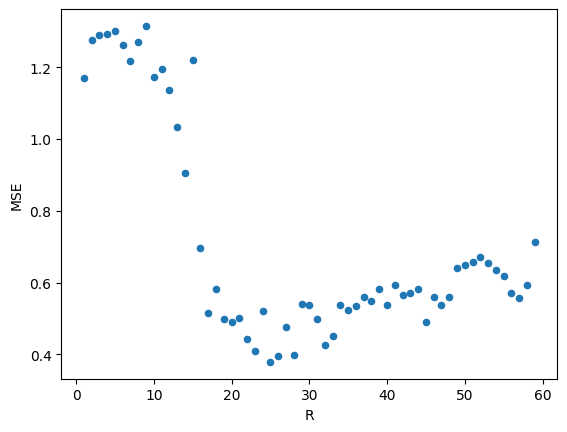

In [5]:
mse.reset_index(drop=False).plot(kind="scatter", x="index", y="0")
plt.xlabel("R")
plt.ylabel("MSE")
plt.show()
plt.close()

In [6]:
print(mse)
R = mse.dropna().iloc[np.argmin(mse.dropna().values.flatten())]
print("\n")
print(R)

              0
index          
1      1.170090
2      1.276930
3      1.290706
4      1.293632
5      1.301287
6      1.262439
7      1.218119
8      1.271389
9      1.314859
10     1.171311
11     1.193901
12     1.137433
13     1.034016
14     0.906630
15     1.220365
16     0.695814
17     0.514399
18     0.582435
19     0.498372
20     0.491706
21     0.500652
22     0.443063
23     0.410842
24     0.520022
25     0.379191
26     0.396973
27     0.477327
28     0.398752
29     0.539949
30     0.536657
31     0.499092
32     0.426153
33     0.452520
34     0.538597
35     0.523046
36     0.534575
37     0.559454
38     0.548347
39     0.583579
40     0.539083
41     0.594409
42     0.565058
43     0.569917
44     0.583583
45     0.489189
46     0.559048
47     0.537609
48     0.558835
49     0.641217
50     0.649676
51     0.657566
52     0.672067
53     0.654799
54     0.633926
55     0.618284
56     0.570753
57     0.557744
58     0.593931
59     0.711880


0    0.379191
Name: 25

In [7]:
try:
    R = R.name
except AttributeError:
    pass
num_paths = 10240
save_path = hermite_dir + f"Ridge_f{diradd.replace('HighNoise', '')}_DriftEvalExp_{num_paths}NPaths_{config.deltaT:.3e}dT_Diff{config.diffusion:.1f}".replace(".", "")
print(save_path)
all_hermite_drifts = np.load(save_path + f"_{R}_drift_est.npy")
all_true_drifts=np.load(save_path + f"_{R}_true_drift.npy", allow_pickle=True)
all_true_paths = np.load(save_path + f"_{R}_true_paths.npy", allow_pickle=True)

/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Ridge/SinLogHighNoise/Ridge_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff100


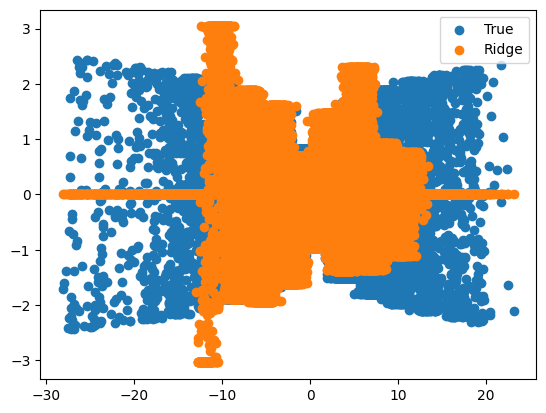

In [8]:
plt.scatter(all_true_paths.flatten(), all_true_drifts.flatten(), label="True")
plt.scatter(all_true_paths.flatten(), all_hermite_drifts.flatten(), label="Ridge")
plt.legend()
plt.show()